In [1]:
import plotly.graph_objects as go
import numpy as np

In [2]:
p_values = np.array([
    [1e-5, 1e-5, 0.50023, 1e-5, 1.0],
    [1e-5, 0.00468, 0.00238, 1e-5, 0.49545],
    [0.25292, 0.58775, 1e-5, 1e-5, 0.03246],
    [0.50023, 0.711, 1e-5, 0.48467, 1.0],
    [1.0, 1.0, 0.04194, 1e-5, 1.0],
    [0.50023, 0.711, 0.03246, 1e-5, 1.0],
    [1.0, 1.0, 1.0, 0.04186, 1.0],
    [1.0, 1.0, 1.0, 1.0, 1.0],
    [1.0, 0.7718, 1e-5, 0.3201, 1.0],
    [1.0, 1.0, 1.0, 1.0, 1.0],
    [1.0, 1.0, 1.0, 1e-5, 1.0],
    [1.0, 1.0, 1.0, 1e-5, 1.0],
    [0.01744, 0.04194, 0.41095, 1e-5, 0.25292],
    [0.01446, 0.48467, 0.69077, 1e-5, 0.089],
    [1.0, 0.8191, 0.12065, 0.66127, 0.06488],
    [0.66927, 0.66927, 0.20053, 1e-5, 0.66927],
    [1.0, 1.0, 1.0, 1e-5, 1.0],
    [1.0, 1.0, 1.0, 1e-5, 1.0],
    [0.02362, 1.0, 0.8191, 1e-5, 0.48467],
    [0.19637, 0.0137, 1.0, 1e-5, 0.85503]
])

In [7]:
crosslinks = [
    "S7-Y16",
    "K10-K196",
    "Y16-K196",
    "K76-T86",
    "K76-T161",
    "K76-K196",
    "K76-S208",
    "T77-S208",
    "S81-T86",
    "S81-K96",
    "K96-K196",
    "K96-S208",
    "T161-K204",
    "K196-S198",
    "K196-K204",
    "K196-S208",
    "K196-K271",
    "K196-S276",
    "S198-S208",
    "T201-S208"
]

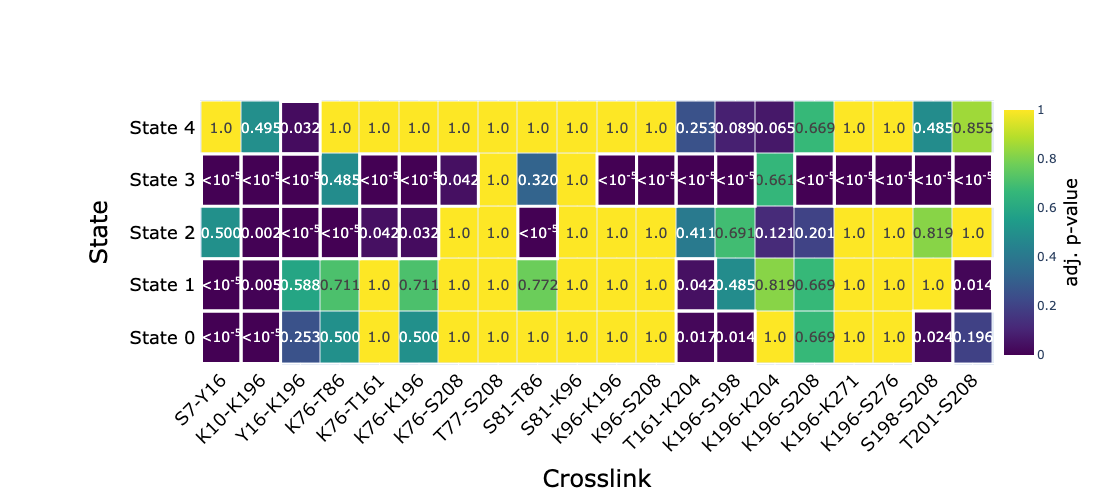

In [46]:
# Example data

# Formatting function
def format_pvalue(p):
    if p <= 0.00001:
        return '<10<sup>-5</sup>'

    elif p == 1.0:
        return '1.0'
    return f'{p:.3f}'

# Convert dictionary to a list of lists
z_values = p_values.T
customdata = np.array([[1 if val < 0.05 else 0 for val in row] for row in z_values])
# np_z_values = np.array(z_values).T
text_values = [[format_pvalue(val) for val in row] for row in z_values]  # Format p-values as strings

# Get the second element of each key for x-axis labels
x_labels = crosslinks#[key.split('_')[1] for key in data.keys()]
y_labels = ['State 0', 'State 1', 'State 2', 'State 3', 'State 4', ]



# Create a heatmap with cell borders
fig = go.Figure(data=go.Heatmap(
    z=z_values,
    x=x_labels,
    y=y_labels,
    colorscale="Viridis",
    showscale=True,
    xgap=1,  # Gap between cells on the x-axis (creates a border)
    ygap=1,   # Gap between cells on the y-axis (creates a border)
    text=text_values,  # Display p-values in cells
    texttemplate="%{text}",  # Format text in cells
    textfont=dict(size=14),  # Adjust font size and color for readability
    zmin=0,  # Set minimum of color scale to 0
    zmax=1,  # Set maximum of color scale to 1
    customdata=customdata,
    hovertemplate='<b>Crosslink:</b> %{x}<br>'
                  '<b>State:</b> %{y}<br>'
                  '<b>adj. p-value:</b> %{text}'
                  '<br><b>Significant:</b> %{customdata}<extra></extra>',
    colorbar=dict(
        title="adj. p-value",
        title_side="right",
        titlefont=dict(size=18, color="black"),
        lenmode="fraction",
        len=1.0,
        y=0.5,
        yanchor="middle",
        x=1.0,
        xanchor="left"
    ),
))

# New code to add borders for significant cells
for i in range(len(y_labels)):
    for j in range(len(x_labels)):
        if z_values[i][j] < 0.05:

            fig.add_shape(
                type="rect",
                x0=j-0.5, y0=i-0.5, x1=j+0.5, y1=i+0.5,
                line=dict(color="white", width=3),
                fillcolor="rgba(0,0,0,0)",
                layer="above"
            )

# Update layout to ensure sufficient space and styling
fig.update_layout(
    xaxis=dict(
        title="Crosslink",
        titlefont=dict(size=24, color="black"),
        tickfont=dict(size=18, color="black"),
        tickangle=-45,
        tickmode='array',
        tickvals=x_labels,
        ticktext=x_labels
    ),
    yaxis=dict(
        title="State",
        titlefont=dict(size=24, color="black"),
        tickfont=dict(size=18, color="black"),
        ticklabelposition="outside",
        automargin=True,
        side="left",
        tickson="boundaries",
        ticklen=20,  # Increase tick length
        tickwidth=2,  # Increase tick width for visibility
        ticks="outside",  # Place ticks outside the plot area
        tickcolor="rgba(0,0,0,0)",  # Make ticks transparent
        linecolor="rgba(0,0,0,0)",  # Make axis line transparent
    ),

    margin=dict(l=200, r=100, t=100, b=100),  # Increase margins to ensure full rendering
    width=1700,  # Set optimal width
    height=500,   # Set optimal height
)

# Show the figure
fig.show()

# Save the figure as a high-resolution image
fig.write_image("Simulation_XLMS_consistent_heatmap.png", scale=10)